In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd

# Read dataset into a pandas DataFrame
df=pd.read_csv('Ukraine_war.csv',parse_dates=['date'])


# Preview data
print(df.head())



                            _type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/ksenijapavlovic/status/150...   
1  https://twitter.com/ty_phoon31/status/15002598...   
2  https://twitter.com/ann_peace22/status/1500259...   
3  https://twitter.com/GardensR4Health/status/150...   
4  https://twitter.com/kbrunolieber/status/150025...   

                       date  \
0 2022-03-05 23:59:58+00:00   
1 2022-03-05 23:59:58+00:00   
2 2022-03-05 23:59:54+00:00   
3 2022-03-05 23:59:52+00:00   
4 2022-03-05 23:59:52+00:00   

                                             content  \
0  There was an anti war protest for #Ukraine as ...   
1  https://t.co/Z1pURKlNHu NATO followed USA into...   
2  @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   
3  @nytimes This war could ha

In [3]:
# drop columns which are not required
df = df.drop(columns=['_type', 'url','content','media','quoteCount', 'id','user','replyCount', 'retweetCount','likeCount','retweetedTweet','quotedTweet','inReplyToTweetId','inReplyToUser','mentionedUsers','coordinates', 'place','hashtags','cashtags','Searh','tcooutlinks','conversationId','lang','source','sourceUrl','sourceLabel','outlinks','tcooutlinks','tcooutlinks',  ] )                             

print(df)


                            date  \
0      2022-03-05 23:59:58+00:00   
1      2022-03-05 23:59:58+00:00   
2      2022-03-05 23:59:54+00:00   
3      2022-03-05 23:59:52+00:00   
4      2022-03-05 23:59:52+00:00   
...                          ...   
231619 2021-12-31 00:07:22+00:00   
231620 2021-12-31 00:06:03+00:00   
231621 2021-12-31 00:03:38+00:00   
231622 2021-12-31 00:03:22+00:00   
231623 2021-12-31 00:01:53+00:00   

                                          renderedContent  
0       There was an anti war protest for #Ukraine as ...  
1       abc.net.au/news/2022-03-0… NATO followed USA i...  
2       @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...  
3       @nytimes This war could have been avoided by e...  
4       @ggreenwald Remember the biggest mistake made ...  
...                                                   ...  
231619  Rusia wants to take back Ukraine, they are our...  
231620  A positive for Russia is that, according to Us...  
231621  @kylegriffin1 @Kary

In [4]:
# Basic cleaning: drop duplicates and NaN text
df = df.drop_duplicates(subset=['renderedContent'])
df = df.dropna(subset=['renderedContent'])

print(df)

                            date  \
0      2022-03-05 23:59:58+00:00   
1      2022-03-05 23:59:58+00:00   
2      2022-03-05 23:59:54+00:00   
3      2022-03-05 23:59:52+00:00   
4      2022-03-05 23:59:52+00:00   
...                          ...   
231619 2021-12-31 00:07:22+00:00   
231620 2021-12-31 00:06:03+00:00   
231621 2021-12-31 00:03:38+00:00   
231622 2021-12-31 00:03:22+00:00   
231623 2021-12-31 00:01:53+00:00   

                                          renderedContent  
0       There was an anti war protest for #Ukraine as ...  
1       abc.net.au/news/2022-03-0… NATO followed USA i...  
2       @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...  
3       @nytimes This war could have been avoided by e...  
4       @ggreenwald Remember the biggest mistake made ...  
...                                                   ...  
231619  Rusia wants to take back Ukraine, they are our...  
231620  A positive for Russia is that, according to Us...  
231621  @kylegriffin1 @Kary

In [5]:
# Create a simplified timestamp column (date only) for aggregation
df['created_date'] = df['date'].dt.date

df = df.rename(columns={'renderedContent': 'text'})

print(df)

                            date  \
0      2022-03-05 23:59:58+00:00   
1      2022-03-05 23:59:58+00:00   
2      2022-03-05 23:59:54+00:00   
3      2022-03-05 23:59:52+00:00   
4      2022-03-05 23:59:52+00:00   
...                          ...   
231619 2021-12-31 00:07:22+00:00   
231620 2021-12-31 00:06:03+00:00   
231621 2021-12-31 00:03:38+00:00   
231622 2021-12-31 00:03:22+00:00   
231623 2021-12-31 00:01:53+00:00   

                                                     text created_date  
0       There was an anti war protest for #Ukraine as ...   2022-03-05  
1       abc.net.au/news/2022-03-0… NATO followed USA i...   2022-03-05  
2       @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   2022-03-05  
3       @nytimes This war could have been avoided by e...   2022-03-05  
4       @ggreenwald Remember the biggest mistake made ...   2022-03-05  
...                                                   ...          ...  
231619  Rusia wants to take back Ukraine, they are our..

In [6]:
df=df.drop(columns=['date'])

print(df)

# Save cleaned CSV for Power BI
df.to_csv('tweets_cleaned.csv', index=False)


                                                     text created_date
0       There was an anti war protest for #Ukraine as ...   2022-03-05
1       abc.net.au/news/2022-03-0… NATO followed USA i...   2022-03-05
2       @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   2022-03-05
3       @nytimes This war could have been avoided by e...   2022-03-05
4       @ggreenwald Remember the biggest mistake made ...   2022-03-05
...                                                   ...          ...
231619  Rusia wants to take back Ukraine, they are our...   2021-12-31
231620  A positive for Russia is that, according to Us...   2021-12-31
231621  @kylegriffin1 @Karyn_resists “Further invades”...   2021-12-31
231622  @remid0d0s0 @BillKristol I fully support Ukrai...   2021-12-31
231623  Biden warns Putin?\n\nWhat does acting decisiv...   2021-12-31

[224553 rows x 2 columns]


In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # 3. Remove mentions and hashtags (optional: keep hashtag words)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)

    # 4. Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Tokenize
    tokens = word_tokenize(text)

    # 6. Remove stopwords and single-character tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]

    # 7. Lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # 8. Rejoin
    return ' '.join(tokens)

# Example usage:
df['clean_text'] = df['text'].apply(preprocess_text)

print(df)

                                                     text created_date  \
0       There was an anti war protest for #Ukraine as ...   2022-03-05   
1       abc.net.au/news/2022-03-0… NATO followed USA i...   2022-03-05   
2       @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   2022-03-05   
3       @nytimes This war could have been avoided by e...   2022-03-05   
4       @ggreenwald Remember the biggest mistake made ...   2022-03-05   
...                                                   ...          ...   
231619  Rusia wants to take back Ukraine, they are our...   2021-12-31   
231620  A positive for Russia is that, according to Us...   2021-12-31   
231621  @kylegriffin1 @Karyn_resists “Further invades”...   2021-12-31   
231622  @remid0d0s0 @BillKristol I fully support Ukrai...   2021-12-31   
231623  Biden warns Putin?\n\nWhat does acting decisiv...   2021-12-31   

                                               clean_text  
0       anti war protest ukraine well getting headl

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])

print(X.shape)


(224553, 5000)


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
2.

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['label'] = df['clean_text'].apply(get_sentiment)
print(df['label'].value_counts())

print(df)
df.to_csv('sentiment_clean_file.csv', index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


label
negative    185472
positive     30270
neutral       8811
Name: count, dtype: int64
                                                     text created_date  \
0       There was an anti war protest for #Ukraine as ...   2022-03-05   
1       abc.net.au/news/2022-03-0… NATO followed USA i...   2022-03-05   
2       @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   2022-03-05   
3       @nytimes This war could have been avoided by e...   2022-03-05   
4       @ggreenwald Remember the biggest mistake made ...   2022-03-05   
...                                                   ...          ...   
231619  Rusia wants to take back Ukraine, they are our...   2021-12-31   
231620  A positive for Russia is that, according to Us...   2021-12-31   
231621  @kylegriffin1 @Karyn_resists “Further invades”...   2021-12-31   
231622  @remid0d0s0 @BillKristol I fully support Ukrai...   2021-12-31   
231623  Biden warns Putin?\n\nWhat does acting decisiv...   2021-12-31   

                      

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\prash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8960388559093362
              precision    recall  f1-score   support

    negative       0.91      0.98      0.94     38422
     neutral       0.81      0.47      0.59      1802
    positive       0.75      0.52      0.62      6101

    accuracy                           0.90     46325
   macro avg       0.83      0.66      0.72     46325
weighted avg       0.89      0.90      0.89     46325



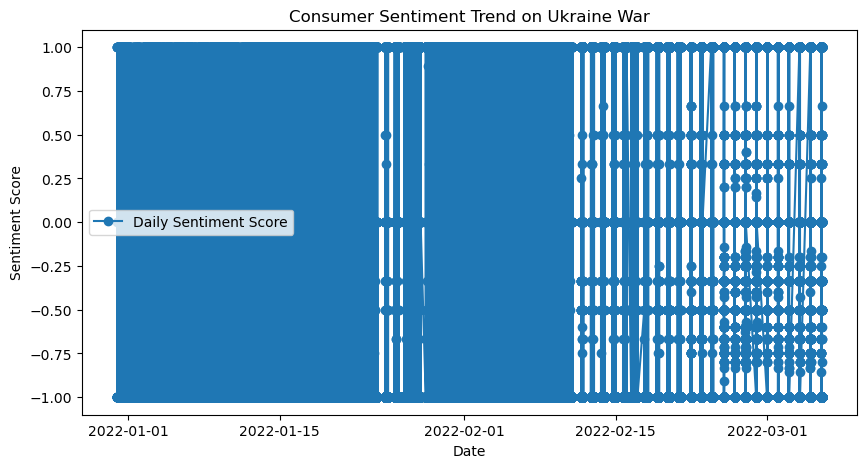

In [57]:
score_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['score'] = df['label'].map(score_map)
daily = df.groupby('date')['score'].mean().reset_index()

# Plot trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(daily['date'], daily['score'], label='Daily Sentiment Score', marker='o')
plt.title('Consumer Sentiment Trend on Ukraine War')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

daily.to_csv('daily_sentiment_ukraine.csv', index=False)


In [58]:
from statsmodels.tsa.arima.model import ARIMA

daily_ts = daily.set_index('date')['score']
model = ARIMA(daily_ts, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=14)
print(forecast)


C:\Users\prash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


196967   -0.738808
196968   -0.737972
196969   -0.737969
196970   -0.737969
196971   -0.737969
196972   -0.737969
196973   -0.737969
196974   -0.737969
196975   -0.737969
196976   -0.737969
196977   -0.737969
196978   -0.737969
196979   -0.737969
196980   -0.737969
Name: predicted_mean, dtype: float64


C:\Users\prash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\prash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
